In [1]:
from __future__ import division # division without truncating decimals 
import pandas as pd # data manipulation library
import numpy as np # numerical computation library
import datetime as dt 
from datetime import time

import matplotlib.pyplot as plt # plotting library
from matplotlib import cm # color maps for plotting
plt.style.use('ggplot') # use the ggplot plotting style

%matplotlib inline

In [2]:
#reading the csv file
#nfl = pd.read_csv('NFL_Play_by_Play_2009-2018_v5.csv', low_memory=False)
nfl = pd.read_csv('reg_pbp_2018.csv', low_memory=False)
#post = pd.read_csv('post_pbp_2018.csv', low_memory=False)


In [3]:
nfl.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,4494,2018090600,PHI,ATL,NaN,NaN,NaN,PHI,NaN,9/6/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
1,4128,2018090909,ARI,WAS,NaN,NaN,NaN,WAS,NaN,9/9/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
2,4680,2018090900,BAL,BUF,NaN,NaN,NaN,BAL,NaN,9/9/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
3,4063,2018090910,CAR,DAL,NaN,NaN,NaN,DAL,NaN,9/9/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,4542,2018090901,CLE,PIT,NaN,NaN,NaN,PIT,NaN,9/9/18,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


# I created a class called 'team' containing all the advanced statistics I'll need to calculate, and created an instance of that class for each team in the NFL

In [4]:
class teams:
    wins = 0
    losses = 0
    pf = 0
    pa = 0
    wp = 0
    opr = 0
    rpi = 0
    pythWins = 0
    offStrat = 0
    turnDiff = 0
    opp = []
    dataSet = pd.DataFrame()
    lastRow = pd.DataFrame()
    abbr = ''

#make a dataframe containing every matchup
columns = ['result', 'homeTeam', 'awayTeam' 'rpi', 'pythWins', 'offStrat', 'turnDiff', 'oppRpi', 'oppPythWins', 'oppOffStrat', 'oppTurnDiff']
df = pd.DataFrame(columns=columns)
df

#Never used this function, but could come in handy later
def fillDF():
    endData = nfl[nfl['desc'] == 'END GAME']
    #print(endData['desc'])

labels = df['result']
train = df.loc[:, 'homeTeam':'oppTurnDiff']

In [5]:
#changing the dates to a date format
nfl['game_date'] = pd.to_datetime(nfl['game_date'])


In [6]:
cardinals = teams()
falcons = teams()
ravens = teams()
bills = teams()
panthers = teams()
bears = teams()
bengals = teams()
browns = teams()
cowboys = teams()
broncos = teams()
lions = teams()
packers = teams()
texans = teams()
colts = teams()
jaguars = teams()
chiefs = teams()
chargers = teams()
rams = teams()
dolphins = teams()
vikings = teams()
patriots = teams()
saints = teams()
giants = teams()
jets = teams()
raiders = teams()
eagles = teams()
steelers = teams()
niners = teams()
seahawks = teams()
buccaneers = teams()
titans = teams()
redskins = teams()

cardinals.abbr = 'ARI' 
falcons.abbr = 'ATL'
ravens.abbr = 'BAL'
bills.abbr = 'BUF'
panthers.abbr = 'CAR'
bears.abbr = 'CHI'
bengals.abbr = 'CIN'
browns.abbr = 'CLE'
cowboys.abbr = 'DAL'
broncos.abbr = 'DEN'
lions.abbr = 'DET'
packers.abbr = 'GB'
texans.abbr = 'HOU'
colts.abbr = 'IND'
jaguars.abbr = 'JAX'
chiefs.abbr = 'KC'
chargers.abbr = 'LAC'
rams.abbr = 'LA'
dolphins.abbr = 'MIA'
vikings.abbr = 'MIN'
patriots.abbr = 'NE'
saints.abbr = 'NO'
giants.abbr = 'NYG'
jets.abbr = 'NYJ'
raiders.abbr = 'OAK'
eagles.abbr = 'PHI'
steelers.abbr = 'PIT'
niners.abbr = 'SF'
seahawks.abbr = 'SEA'
buccaneers.abbr = 'TB'
titans.abbr = 'TEN'
redskins.abbr = 'WAS'

teamsAll = [cardinals, falcons, ravens, bills, panthers, bears, bengals, browns, cowboys, broncos, lions, packers,
            texans, colts, jaguars, chiefs, chargers, rams, dolphins, vikings, patriots, saints, giants, jets, raiders, eagles, steelers,
            niners, seahawks, buccaneers, titans, redskins]


In [7]:
#calculate weeks
nfl.loc[(nfl.game_date < '9/11/18'), 'week'] = 1
nfl.loc[((nfl.game_date > '9/11/18') & (nfl.game_date < '9/18/18')), 'week'] = 2
nfl.loc[((nfl.game_date > '9/18/18') & (nfl.game_date < '9/25/18')), 'week'] = 3
nfl.loc[((nfl.game_date > '9/25/18') & (nfl.game_date < '10/02/18')), 'week'] = 4
nfl.loc[((nfl.game_date > '10/02/18') & (nfl.game_date < '10/09/18')), 'week'] = 5
nfl.loc[((nfl.game_date > '10/09/18') & (nfl.game_date < '10/16/18')), 'week'] = 6
nfl.loc[((nfl.game_date > '10/16/18') & (nfl.game_date < '10/23/18')), 'week'] = 7
nfl.loc[((nfl.game_date > '10/23/18') & (nfl.game_date < '10/30/18')), 'week'] = 8
nfl.loc[((nfl.game_date > '10/30/18') & (nfl.game_date < '11/06/18')), 'week'] = 9
nfl.loc[((nfl.game_date > '11/06/18') & (nfl.game_date < '11/13/18')), 'week'] = 10
nfl.loc[((nfl.game_date > '11/13/18') & (nfl.game_date < '11/20/18')), 'week'] = 11
nfl.loc[((nfl.game_date > '11/20/18') & (nfl.game_date < '11/27/18')), 'week'] = 12
nfl.loc[((nfl.game_date > '11/27/18') & (nfl.game_date < '12/04/18')), 'week'] = 13
nfl.loc[((nfl.game_date > '12/04/18') & (nfl.game_date < '12/11/18')), 'week'] = 14
nfl.loc[((nfl.game_date > '12/11/18') & (nfl.game_date < '12/18/18')), 'week'] = 15
nfl.loc[((nfl.game_date > '12/18/18') & (nfl.game_date < '12/25/18')), 'week'] = 16
nfl.loc[((nfl.game_date > '12/25/18')), 'week'] = 17

len(nfl[(nfl.week == 10) & (nfl.game_seconds_remaining == 0)])

14

In [8]:
weeks = []
for i in range(1,18):
    weeks .append(i)
weeks

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

# Here is an important cell. This is where I wrote the functions to calculate all the advanced statistics from the play-by-play data

In [148]:
#Calculate RPI, PythWins, OffStreat, and Turn Diff for every team
#to get the final score of the game, parse the description for 'END GAME' and then grab the total_home_score and total_away_score
def calcScores(team, data, df):
    homeScore = data['total_home_score']
    awayScore = data['total_away_score']

    team.pf = data[(data['home_team']==team.abbr)].total_home_score.sum()
    team.pa = data[(data['home_team']==team.abbr)].total_away_score.sum()
    team.pa += data[(data['away_team']==team.abbr)].total_home_score.sum()
    team.pf += data[(data['away_team']==team.abbr)].total_away_score.sum()
    
    team.wins = data[(data['home_team']==team.abbr) & (data['total_home_score'] > data['total_away_score'])].game_id.count()
    team.losses = data[(data['home_team']==team.abbr) & (data['total_home_score'] < data['total_away_score'])].game_id.count()
    team.wins += data[(data['away_team']==team.abbr) & (data['total_home_score'] < data['total_away_score'])].game_id.count()
    team.losses += data[(data['away_team']==team.abbr) & (data['total_home_score'] > data['total_away_score'])].game_id.count()
    
    data.loc[((data.home_team==team.abbr) & (data.total_home_score>data.total_away_score)) | ((data.away_team==team.abbr) & (data.total_home_score>data.total_away_score)), 'outcome'] = 1
    data.loc[((data.home_team==team.abbr) & (data.total_home_score<data.total_away_score)) | ((data.away_team==team.abbr) & (data.total_home_score<data.total_away_score)), 'outcome'] = 0
    
    df['outcome'] = data[('outcome')]
    df['matchID'] = data[('game_id')]
    df['team'] = data[('home_team')]
    df['away'] = data[('away_team')]
    df['week'] = data[('week')]
    df = df[np.isfinite(df['outcome'])]
    #print(df)
    return df

def calcOOR(team):
    wp3 = 0
    for tm in teamsAll:
        if tm.abbr == team:
            wp3 = (tm.wins/(tm.wins+tm.losses))
    return wp3
def calcOR(team, opp):
    oppWP = 0
    for tm in teamsAll:
        if tm.abbr == opp:
            wp2 = (tm.wins/(tm.wins+tm.losses))
        oppWP += (calcOOR(tm))/len(tm.opp)
    team.oor = oppWP
    return wp2
 
def calcWP(team):
    oppWP = 0
    wp = (team.wins)/(team.wins+team.losses)
    for opp in team.opp:
        oppWP += (calcOR(team, opp))/len(team.opp)
    team.wp = wp
    team.opr = oppWP
def calcRPI(team):
    team.rpi = (0.25 * team.wp) + (0.5 * team.opr) + (0.25 * team.oor)

def calcPythWins(team):
    team.pythWins = (team.pf**2.37) / (team.pf**2.37 + team.pa**2.37)

def calcOffStrat(team, data):
    run = data.rush_attempt.sum()
    passAtt = data.pass_attempt.sum()
    team.offStrat = passAtt/run

def calcTurnDiff(team, data):
    offen = data[data['posteam']==team.abbr]
    defen = data[data['defteam']==team.abbr]
    TA = defen.interception.sum() + defen.fumble_lost.sum()
    TO = offen.interception.sum() + offen.fumble_lost.sum()
    team.turnDiff = TA-TO
    #print(team.turnDiff, team.abbr)
    
#### ADD NET YARDS PER PLAY, WEEKLY FIRST DOWNS? 3RD DOWN PERCENTAGE?
#### IF DEFENSIVE OR SPECIAL TEAMS TD, SUBTRACT 4 FROM SCORE. THESE ARE FLUKE PLAYS
#### GET EACH ROW AS A NEW SET OF WEEKLY DATA. LABEL EACH WEEK, A NEW WEEK OCCURS WHEN GAME_SECONDS_REMAINING=0. DO WEEK++
def getData():
    list1 = pd.DataFrame(columns = ['matchID', 'week' 'outcome', 'team', 'away'])
    #for week in weeks:
    for team in teamsAll:
        #weekData = nfl[nfl['week'] <= week]
        teamData = nfl[(nfl["posteam"] == team.abbr) | (nfl["defteam"] == team.abbr)]
        #endData = nfl[nfl['desc'] == 'END GAME'] #use time and game_half
        endData = nfl[nfl['game_seconds_remaining'] == 0] #in excel change 00:00:00 to just 0
        #print(endData['desc'])
        #endData.sample(n=4)
        result = pd.DataFrame(columns = ['matchID', 'outcome', 'team', 'away', 'week'])
        opp = pd.DataFrame(columns = ['opp'])
        result = calcScores(team, endData, result)
        opp['opp'] = result[result['team'] == team.abbr].away
        opp = opp['opp'].append(result[result['away'] == team.abbr].team)
        team.opp = opp
        list1 = list1.append(result, ignore_index = True)
        calcOffStrat(team, teamData)
        calcTurnDiff(team, teamData)
        #result.append(result)
    list1.drop_duplicates(subset ="matchID", keep = "first", inplace = True)
    
    columns = ['matchup', 'week', 'home', 'away', 'rpi', 'pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat', 'outcome']
    matchups = pd.DataFrame(columns = columns)
    matchups['matchup'] = list1['matchID']
    matchups['week'] = list1['week']
    matchups['home'] = list1['team']
    matchups['away'] = list1['away']
    matchups['outcome'] = list1['outcome']

    for team in teamsAll:
        calcWP(team)
        calcPythWins(team)
        calcRPI(team)
        
        matchups.loc[matchups['home']==team.abbr, 'turn_diff'] = team.turnDiff
        matchups.loc[matchups['away']==team.abbr, 'opp_turn_diff'] = team.turnDiff
        
        matchups.loc[matchups['home']==team.abbr, 'off_strat'] = team.offStrat
        matchups.loc[matchups['away']==team.abbr, 'opp_off_strat'] = team.offStrat
        
        matchups.loc[matchups['home']==team.abbr, 'rpi'] = team.rpi
        matchups.loc[matchups['away']==team.abbr, 'opp_rpi'] = team.rpi
        
        matchups.loc[matchups['home']==team.abbr, 'pyth_wins'] = team.pythWins
        matchups.loc[matchups['away']==team.abbr, 'opp_pyth_wins'] = team.pythWins
        
    return matchups

result = getData()
#print(result)


###CREATS NEW DATA SET CONTAINING THE ADVANCED STATISTICS THAT WE CAN TRAIN OUR MODEL WITH
result.to_csv('NFL_metrics.csv')
df = result[['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']]
labels = result[['outcome']]


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

In [63]:
result[(result['home'] == 'ARI') | (result['away']=='ARI')]


,matchup,week,home,away,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat,outcome
0,2018090909,1.0,ARI,WAS,0.319574,0.114676,-12,1.27765,0.332176,0.341686,5,1.37923,0.0
1,2018091609,2.0,LA,ARI,0.432587,0.675645,13,1.38987,0.319574,0.114676,-12,1.27765,1.0
2,2018092311,3.0,ARI,CHI,0.319574,0.114676,-12,1.27765,0.433074,0.742034,12,1.51425,0.0
3,2018100710,5.0,SF,ARI,0.300944,0.354522,-23,1.34062,0.319574,0.114676,-12,1.27765,0.0
4,2018101405,6.0,MIN,ARI,0.394501,0.529845,-2,1.51253,0.319574,0.114676,-12,1.27765,1.0
5,2018101800,7.0,ARI,DEN,0.319574,0.114676,-12,1.27765,0.33308,0.495163,3,1.47694,0.0
6,2018102809,8.0,ARI,SF,0.319574,0.114676,-12,1.27765,0.300944,0.354522,-23,1.34062,1.0
7,2018111105,10.0,KC,ARI,0.4105,0.689632,7,1.59559,0.319574,0.114676,-12,1.27765,1.0
8,2018112508,12.0,LAC,ARI,0.434482,0.655766,5,1.43593,0.319574,0.114676,-12,1.27765,1.0
9,2018120911,14.0,ARI,DET,0.319574,0.114676,-12,1.27765,0.339429,0.439858,-9,1.43936,0.0


In [149]:
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
#df[0]*=150
#df[1]*=100
#df[2]*=50
#df[3]*=50
#df[4]*=150
#df[5]*=100
#df[6]*=50
#df[7]*=50


#n1 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n2 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n3 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n4 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n5 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#n6 = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))
#normalized = ((df['rpi']-min(df['rpi']))/(max(df['rpi'])-min(df['rpi'])))

df['week'] = result['week']
df['home'] = result['home']
df['away'] = result['away']

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [150]:
df

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat,week,home,away
0,0.204386,0.000000,0.305556,0.137462,0.283120,0.361850,0.777778,0.284392,1.0,ARI,WAS
1,0.910510,0.894177,1.000000,0.299787,0.204386,0.000000,0.305556,0.137462,2.0,LA,ARI
2,0.204386,0.000000,0.305556,0.137462,0.913552,1.000000,0.972222,0.479701,3.0,ARI,CHI
3,0.087981,0.382312,0.000000,0.228549,0.204386,0.000000,0.305556,0.137462,5.0,SF,ARI
4,0.672542,0.661773,0.583333,0.477214,0.204386,0.000000,0.305556,0.137462,6.0,MIN,ARI
5,0.204386,0.000000,0.305556,0.137462,0.288770,0.606492,0.722222,0.425734,7.0,ARI,DEN
6,0.204386,0.000000,0.305556,0.137462,0.087981,0.382312,0.000000,0.228549,8.0,ARI,SF
7,0.772509,0.916472,0.833333,0.597355,0.204386,0.000000,0.305556,0.137462,10.0,KC,ARI
8,0.922348,0.862490,0.777778,0.366411,0.204386,0.000000,0.305556,0.137462,12.0,LAC,ARI
9,0.204386,0.000000,0.305556,0.137462,0.328440,0.518336,0.388889,0.371368,14.0,ARI,DET


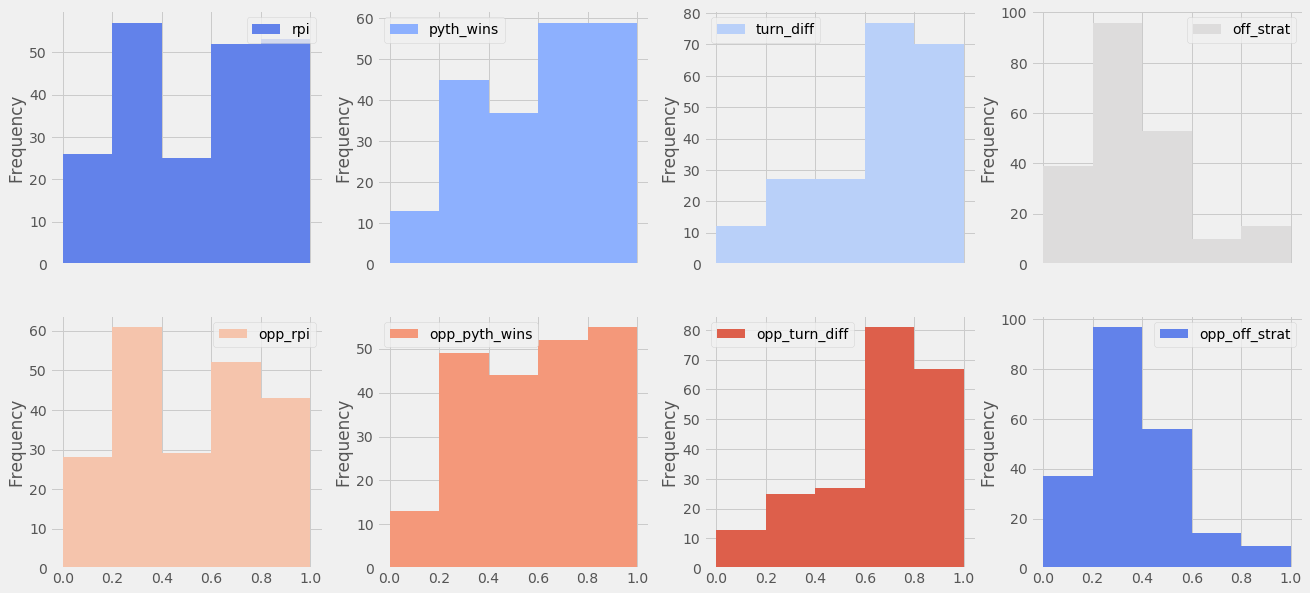

In [104]:
labels = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.plot.hist(subplots=True, layout=(4,4), figsize=(20, 20), bins=5);

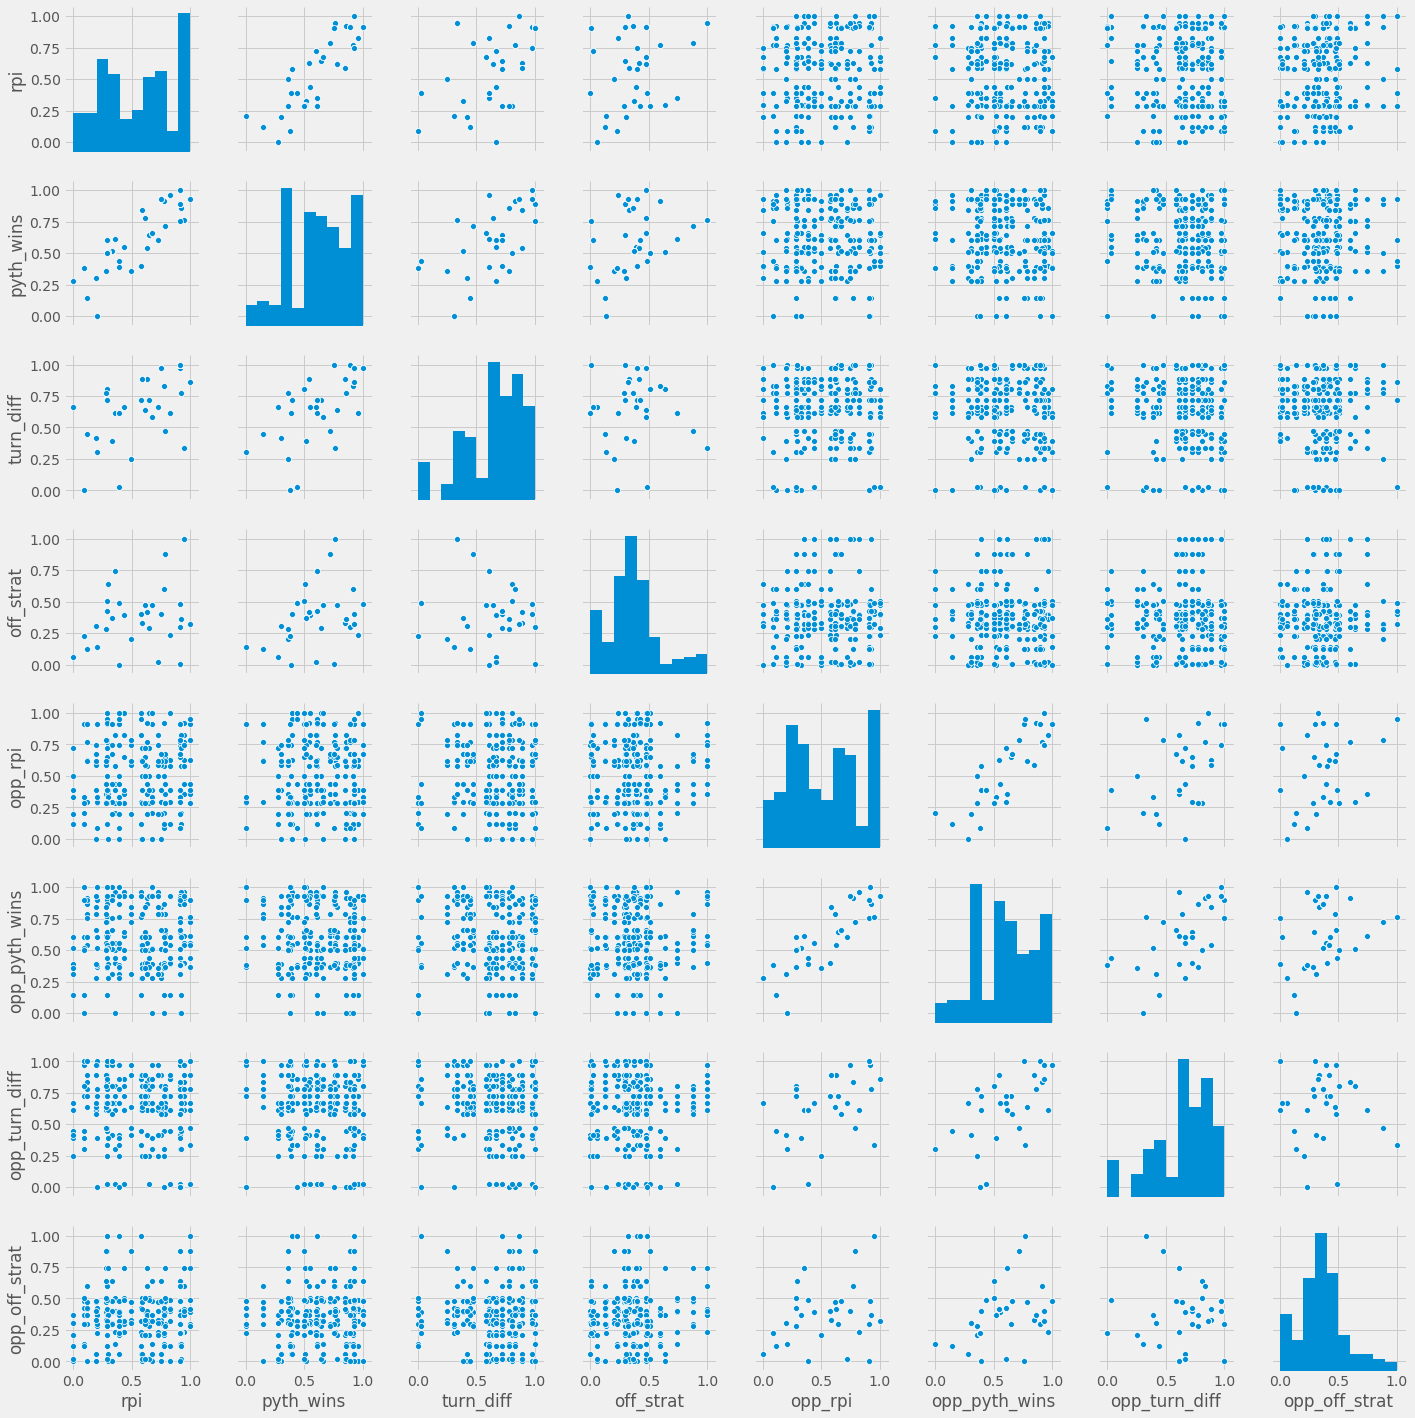

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# This allows plots to appear directly in the notebook.
%matplotlib inline
plt.style.use('fivethirtyeight')

sns.pairplot(df)

In [106]:
X = df - df.mean()

X.T.dot(X) / (len(df)-1)

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,0.083184,0.061838,0.036075,0.018851,0.001747,-0.000911,-0.003421,0.004635
pyth_wins,0.061838,0.063669,0.036777,0.020136,-0.001964,-0.006865,-0.005489,-0.000043
turn_diff,0.036075,0.036777,0.066085,-0.004890,-0.001735,-0.004726,-0.006214,-0.000320
off_strat,0.018851,0.020136,-0.004890,0.054347,-0.001003,-0.002333,0.000134,0.003862
opp_rpi,0.001747,-0.001964,-0.001735,-0.001003,0.078166,0.059211,0.035490,0.014076
opp_pyth_wins,-0.000911,-0.006865,-0.004726,-0.002333,0.059211,0.062516,0.037504,0.019013
opp_turn_diff,-0.003421,-0.005489,-0.006214,0.000134,0.035490,0.037504,0.065312,0.001830
opp_off_strat,0.004635,-0.000043,-0.000320,0.003862,0.014076,0.019013,0.001830,0.044940


In [107]:

df.cov()


,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,0.083184,0.061838,0.036075,0.018851,0.001747,-0.000911,-0.003421,0.004635
pyth_wins,0.061838,0.063669,0.036777,0.020136,-0.001964,-0.006865,-0.005489,-0.000043
turn_diff,0.036075,0.036777,0.066085,-0.004890,-0.001735,-0.004726,-0.006214,-0.000320
off_strat,0.018851,0.020136,-0.004890,0.054347,-0.001003,-0.002333,0.000134,0.003862
opp_rpi,0.001747,-0.001964,-0.001735,-0.001003,0.078166,0.059211,0.035490,0.014076
opp_pyth_wins,-0.000911,-0.006865,-0.004726,-0.002333,0.059211,0.062516,0.037504,0.019013
opp_turn_diff,-0.003421,-0.005489,-0.006214,0.000134,0.035490,0.037504,0.065312,0.001830
opp_off_strat,0.004635,-0.000043,-0.000320,0.003862,0.014076,0.019013,0.001830,0.044940


In [69]:
df.corr()

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
rpi,1.000000,0.849716,0.486564,0.280369,0.021670,-0.012640,-0.046409,0.075814
pyth_wins,0.849716,1.000000,0.566981,0.342320,-0.027842,-0.108814,-0.085122,-0.000795
turn_diff,0.486564,0.566981,1.000000,-0.081594,-0.024140,-0.073534,-0.094580,-0.005875
off_strat,0.280369,0.342320,-0.081594,1.000000,-0.015386,-0.040018,0.002250,0.078152
opp_rpi,0.021670,-0.027842,-0.024140,-0.015386,1.000000,0.847030,0.496709,0.237497
opp_pyth_wins,-0.012640,-0.108814,-0.073534,-0.040018,0.847030,1.000000,0.586936,0.358707
opp_turn_diff,-0.046409,-0.085122,-0.094580,0.002250,0.496709,0.586936,1.000000,0.033778
opp_off_strat,0.075814,-0.000795,-0.005875,0.078152,0.237497,0.358707,0.033778,1.000000


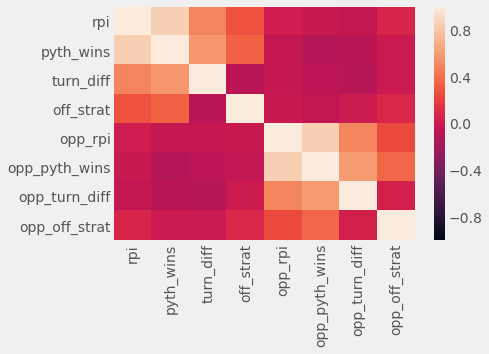

In [108]:
sns.set_palette("coolwarm", 7)
sns.heatmap(df.corr(), vmin=-1, vmax=1) 

In [71]:
df.describe()

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,83.814396,61.411783,32.440010,18.715379,79.502835,59.364387,32.003130,18.397347
std,43.262421,25.232639,12.853465,11.656182,41.937250,25.003192,12.778112,10.599489
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.976438,39.570746,23.611111,11.621190,43.315533,39.095750,23.611111,11.621190
50%,87.951977,60.649170,33.333333,18.320549,86.457480,60.332532,33.333333,18.568389
75%,118.027826,84.623009,41.666667,23.860706,115.876280,84.623009,40.277778,23.860706
max,150.000000,100.000000,50.000000,50.000000,150.000000,100.000000,50.000000,50.000000


In [72]:
df.rpi.mean()

83.81439626558901

In [73]:
df.rpi.sort_values()

180      0.000000
178      0.000000
176      0.000000
44       0.000000
113      0.000000
152      0.000000
106     13.197081
206     13.197081
70      13.197081
3       13.197081
199     13.197081
110     13.197081
171     13.197081
85      17.420777
107     17.420777
140     17.420777
168     17.420777
166     17.420777
205     17.420777
157     17.420777
139     29.784099
134     29.784099
177     29.784099
183     29.784099
188     29.784099
42      29.784099
0       30.657881
2       30.657881
11      30.657881
9       30.657881
          ...    
68     137.032800
65     137.032800
62     137.032800
63     137.032800
61     137.032800
60     137.032800
64     137.032800
79     138.352151
8      138.352151
153    138.352151
162    138.352151
163    138.352151
164    138.352151
34     138.352151
15     142.208012
82     142.208012
154    142.208012
54     142.208012
87     142.208012
189    142.208012
167    142.208012
27     142.208012
172    150.000000
196    150.000000
83     150

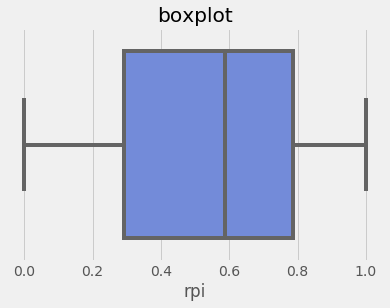

In [109]:
# Create the boxplot
ax = sns.boxplot(x="rpi", data=df)

# Set title
ax.set_title("boxplot")

# Show the plot
plt.show()

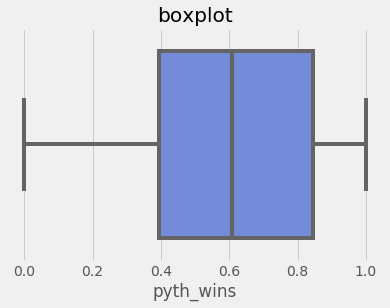

In [110]:
ax = sns.boxplot(x="pyth_wins", data=df)

# Set title
ax.set_title("boxplot")

# Show the plot
plt.show()

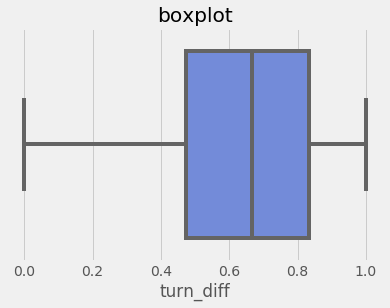

In [111]:
ax = sns.boxplot(x="turn_diff", data=df)

# Set title
ax.set_title("boxplot")

# Show the plot
plt.show()

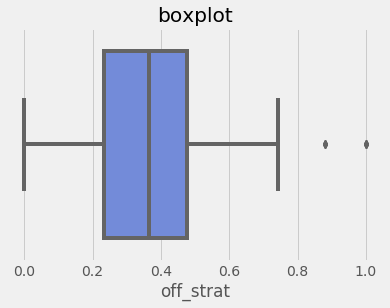

In [112]:
ax = sns.boxplot(x="off_strat", data=df)

# Set title
ax.set_title("boxplot")

# Show the plot
plt.show()

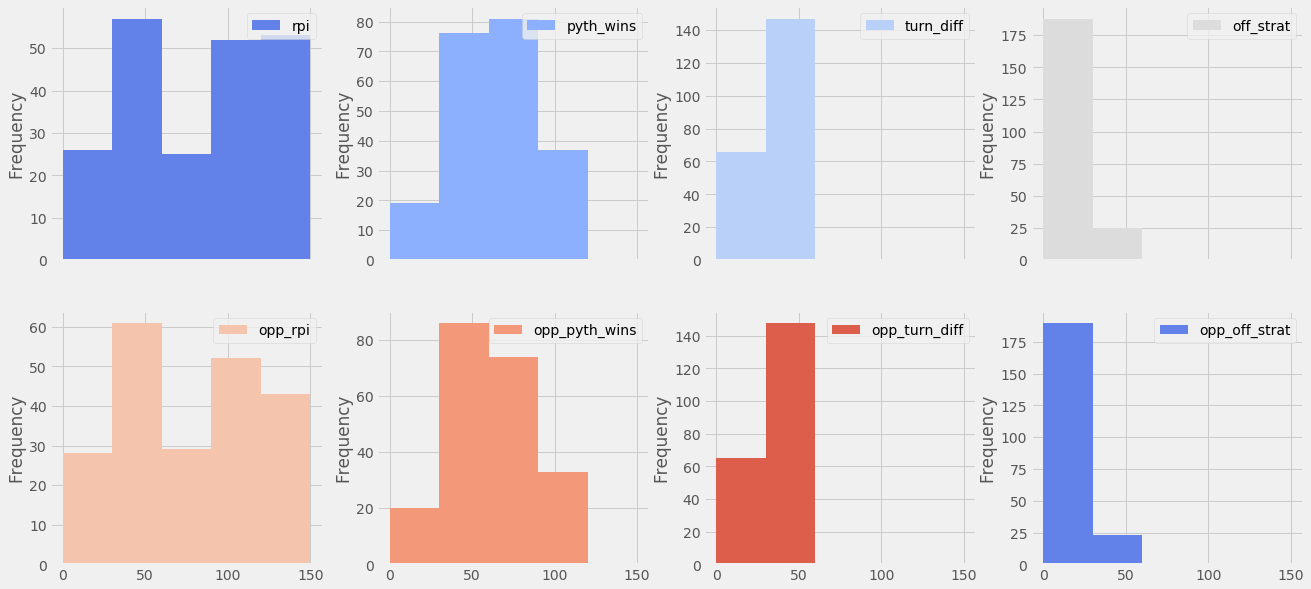

In [78]:
#labels = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
df.plot.hist(subplots=True, layout=(4,4), figsize=(20, 20), bins=5);

In [155]:
train

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat
35,0.824352,0.962508,0.611111,0.232424,0.627611,0.542502,0.888889,0.420150
28,0.722352,0.603325,0.666667,0.020883,0.824352,0.962508,0.611111,0.232424
42,0.198561,0.306423,0.416667,0.305261,0.391451,0.390958,0.611111,0.000000
82,0.948053,0.766340,0.333333,1.000000,0.576383,0.395707,0.722222,0.399547
100,0.286460,0.500003,0.805556,0.505981,0.646249,0.646567,0.722222,0.294832
145,0.722352,0.603325,0.666667,0.020883,0.616477,0.783762,0.638889,0.472238
51,0.283120,0.361850,0.777778,0.284392,0.437578,0.553721,0.666667,0.390551
120,0.910510,0.894177,1.000000,0.299787,0.293176,0.507559,0.805556,0.639667
172,1.000000,0.927544,0.861111,0.324187,0.910510,0.894177,1.000000,0.299787
76,0.576383,0.395707,0.722222,0.399547,1.000000,0.927544,0.861111,0.324187


In [113]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(df,
                                                          result['outcome'],
                                                          test_size=0.33,
                                                          random_state=42)

In [114]:
#Then build classifier for every team based on each of their games and use W/L as the result

# Here is our first classification model.
   ## The result for Naive-Bayes is ~79% accuracy:

In [115]:
from sklearn.naive_bayes import GaussianNB


# Initialize our classifier
gnb = GaussianNB()

# Train our classifier
model = gnb.fit(train, train_labels.values.ravel())

In [116]:
#print(test_labels)

In [117]:
preds = gnb.predict(test)
#print(preds)


In [118]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
print(accuracy_score(test_labels, preds))

0.7464788732394366


# Next we have the Decision Tree Model:

In [119]:
features = df.values


In [120]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=10)


from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, features, result['outcome'], scoring='accuracy')


print("Scores:", scores, "\n")
print("Accuracy:", np.mean(scores))

Scores: [0.63380282 0.61971831 0.69014085] 

Accuracy: 0.647887323943662


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [121]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
#We will fit this transformer to the home teams so that it learns an integer
#representation for each team
encoding.fit(result["home"].values)

home_teams = encoding.transform(result["home"].values)
visitor_teams = encoding.transform(result["away"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T

#we use the OneHotEncoder transformer to encode 

onehot = OneHotEncoder()
#We fit and transform 
X_teams = onehot.fit_transform(X_teams).todense()

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [122]:
all_features = np.hstack([df, X_teams])

#we run the decision tree on the new dataset
classifier = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, result['outcome'], scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.6619718309859155


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics

classifier=DecisionTreeClassifier()
train.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']
test.columns = ['rpi','pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']

print(test.head())
classifier=classifier.fit(train,train_labels)
preds=classifier.predict(test)
sklearn.metrics.confusion_matrix(test_labels,preds)
sklearn.metrics.accuracy_score(test_labels, preds)
print("Accuracy: ", sklearn.metrics.accuracy_score(test_labels, preds))

          rpi  pyth_wins  turn_diff  off_strat   opp_rpi  opp_pyth_wins  \
9    0.204386   0.000000   0.305556   0.137462  0.328440       0.518336   
197  0.286460   0.500003   0.805556   0.505981  0.786852       0.719521   
66   0.328440   0.518336   0.388889   0.371368  0.913552       1.000000   
191  1.000000   0.927544   0.861111   0.324187  0.388837       0.437173   
117  0.328440   0.518336   0.388889   0.371368  0.672542       0.661773   

     opp_turn_diff  opp_off_strat  
9         0.388889       0.371368  
197       0.472222       0.878844  
66        0.972222       0.479701  
191       0.027778       0.487381  
117       0.583333       0.477214  
Accuracy:  0.6056338028169014


In [124]:
#Displaying the decision tree
from sklearn import tree
#from StringIO import StringIO
from io import StringIO
#from StringIO import StringIO 
from IPython.display import Image
out = StringIO()
tree.export_graphviz(classifier, out_file=out)

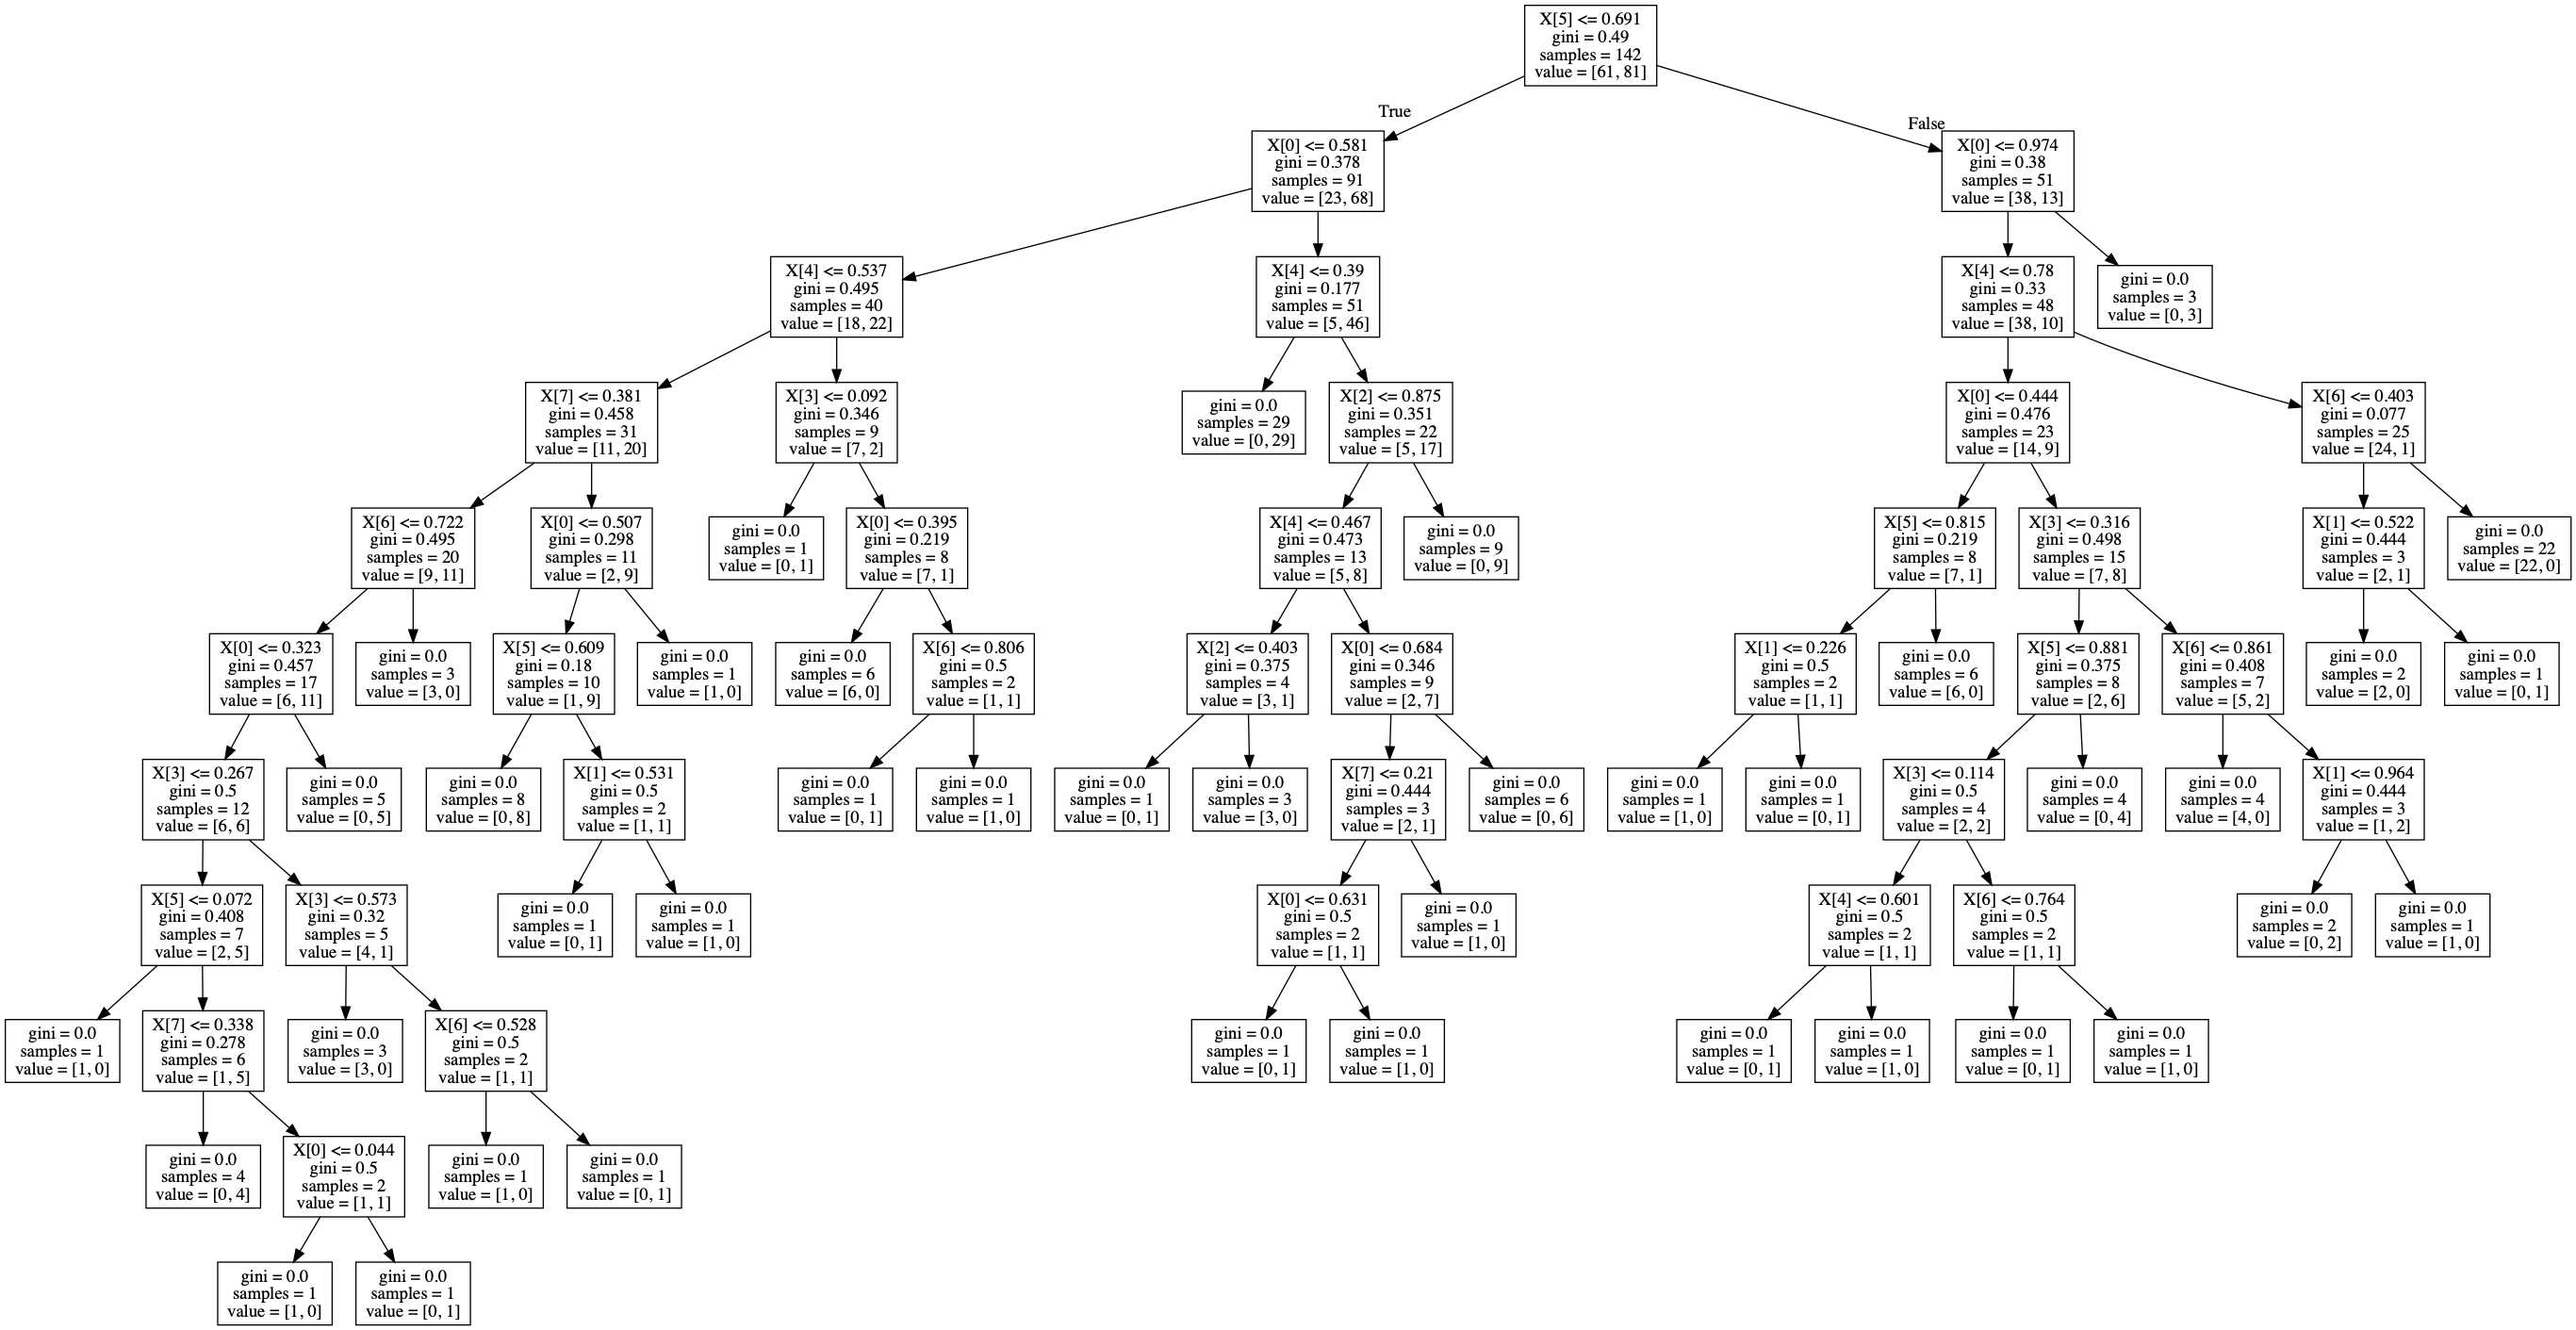

In [125]:
import pydotplus
graph=pydotplus.graph_from_dot_data(out.getvalue())
Image(graph.create_png())

# Finally, we have our Random Forest Model
## The mean accuracy was ~65% accurate, and the best Decision Tree in the forest was ~71% accurate

In [126]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state=10)
scores = cross_val_score(classifier, all_features, result['outcome'], scoring='accuracy')
print("Accuracy:", np.mean(scores))

Accuracy: 0.6525821596244131


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20

In [127]:
from sklearn.model_selection import GridSearchCV
a = {
"max_features": [2, 10, 'auto'],
"n_estimators": [100,],
"criterion": ["gini", "entropy"],
"min_samples_leaf": [2, 4, 6],
}
classifier = RandomForestClassifier(random_state=10)
grid = GridSearchCV(classifier, a)
grid.fit(all_features, result['outcome'])
print("Accuracy:", grid.best_score_)

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Accuracy: 0.7276995305164319


In [128]:
print('Baseline:', train_labels.value_counts(normalize=True)[1].round(3))


Baseline: 0.57


# Dabbling around in Regression

In [129]:
random_state = 11

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train, train_labels)

# Make predictions using the testing set
y_pred = regr.predict(test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_labels,y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_labels, y_pred))

Coefficients: 
 [ 0.1918899   0.56340829 -0.07901223 -0.31573611 -0.65211291 -0.27337062
 -0.04867472  0.21189473]
Mean squared error: 0.20
Variance score: 0.13


In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



# Computing the baseline
print('Baseline:', train_labels.value_counts(normalize=True)[0].round(3))

# Instantiating a Logistic Regression Model
lr = LogisticRegression()

# Instantiating a Support Vector Machine Model
svc = SVC()

# Fitting the models
lr.fit(train, train_labels)
svc.fit(train, train_labels)

# Scoring the models:
print('Logistic Regression:', lr.score(test, test_labels).round(3))
print('Support Vector Machine:', svc.score(test, test_labels).round(3))

Baseline: 0.43
Logistic Regression: 0.803
Support Vector Machine: 0.775


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


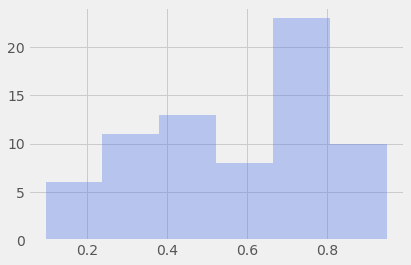

In [131]:
import seaborn as sns

y_proba = lr.predict_proba(test)
sns.distplot(y_proba[:,1], kde=False)

In [132]:
import sklearn.metrics as metrics
y_pred_rounded = np.where(y_pred >= 0.5, 1, 0)
print(metrics.confusion_matrix(test_labels, y_pred_rounded))

[[19  7]
 [11 34]]


In [133]:
import statsmodels.api as sm

train_labels = list(train_labels)

# perform the regression
logit = sm.Logit(train_labels, train)

# save the results and print
result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.446732
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  142
Model:                          Logit   Df Residuals:                      134
Method:                           MLE   Df Model:                            7
Date:                Fri, 23 Aug 2019   Pseudo R-squ.:                  0.3461
Time:                        09:09:19   Log-Likelihood:                -63.436
converged:                       True   LL-Null:                       -97.014
                                        LLR p-value:                 5.539e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
rpi               0.7198      1.349      0.533      0.594      -1.925       3.364
pyth_wins         4.

In [134]:
# predict the results 
preds=result.predict(test)

# add probabilities to next week
new_test = test
new_test['win_prob'] = preds
#test

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [135]:
new_test

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat,win_prob
9,0.204386,0.000000,0.305556,0.137462,0.328440,0.518336,0.388889,0.371368,0.202872
197,0.286460,0.500003,0.805556,0.505981,0.786852,0.719521,0.472222,0.878844,0.263581
66,0.328440,0.518336,0.388889,0.371368,0.913552,1.000000,0.972222,0.479701,0.107839
191,1.000000,0.927544,0.861111,0.324187,0.388837,0.437173,0.027778,0.487381,0.961185
117,0.328440,0.518336,0.388889,0.371368,0.672542,0.661773,0.583333,0.477214,0.316032
111,0.328440,0.518336,0.388889,0.371368,0.748632,0.928842,0.972222,0.398318,0.192974
15,0.948053,0.766340,0.333333,1.000000,0.353298,0.611574,0.611111,0.741931,0.839270
86,0.627611,0.542502,0.888889,0.420150,0.922348,0.862490,0.777778,0.366411,0.128284
75,0.772509,0.916472,0.833333,0.597355,0.576383,0.395707,0.722222,0.399547,0.830393
144,0.616477,0.783762,0.638889,0.472238,0.286460,0.500003,0.805556,0.505981,0.920466


In [144]:
# home team wins if team has greater than 50% chance of winning
new_test['pred_home_win'] = np.where(new_test['win_prob']>.5,1,0)
#new_test['pred_home_win_75'] = np.where(new_test['win_prob']>0.75,1,0)
new_test['home_win'] = list(test_labels)
# show select columns
new_test

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat,win_prob,pred_home_win,pred_home_win_75,home_win,prediction,winner
9,0.204386,0.000000,0.305556,0.137462,0.328440,0.518336,0.388889,0.371368,0.377262,0,0,0.0,0.0,0.0
197,0.286460,0.500003,0.805556,0.505981,0.786852,0.719521,0.472222,0.878844,0.228786,0,0,0.0,0.0,0.0
66,0.328440,0.518336,0.388889,0.371368,0.913552,1.000000,0.972222,0.479701,0.088384,0,0,0.0,0.0,0.0
191,1.000000,0.927544,0.861111,0.324187,0.388837,0.437173,0.027778,0.487381,0.971176,1,1,0.0,1.0,0.0
117,0.328440,0.518336,0.388889,0.371368,0.672542,0.661773,0.583333,0.477214,0.350295,0,0,0.0,0.0,0.0
111,0.328440,0.518336,0.388889,0.371368,0.748632,0.928842,0.972222,0.398318,0.162281,0,0,1.0,0.0,1.0
15,0.948053,0.766340,0.333333,1.000000,0.353298,0.611574,0.611111,0.741931,0.823372,1,1,1.0,1.0,1.0
86,0.627611,0.542502,0.888889,0.420150,0.922348,0.862490,0.777778,0.366411,0.126335,0,0,0.0,0.0,0.0
75,0.772509,0.916472,0.833333,0.597355,0.576383,0.395707,0.722222,0.399547,0.798629,1,1,1.0,1.0,1.0
144,0.616477,0.783762,0.638889,0.472238,0.286460,0.500003,0.805556,0.505981,0.890291,1,1,1.0,1.0,1.0


In [137]:
print(accuracy_score(new_test['home_win'], new_test['pred_home_win']))

0.7605633802816901


In [138]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# specify the alphas
param_grid = {'C': np.logspace(-5, 5, 15)}

# Instantiate a logistic regression classifier: logreg
logit = LogisticRegression()

# specify five-fold cross validation logistic regression while tuning over alpha space
logit_cv = GridSearchCV(logit, param_grid, cv=5)

# fit the model
logit_cv.fit(train,train_labels)

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 5.17947e-05, 2.68270e-04, 1.38950e-03, 7.19686e-03,
       3.72759e-02, 1.93070e-01, 1.00000e+00, 5.17947e+00, 2.68270e+01,
       1.38950e+02, 7.19686e+02, 3.72759e+03, 1.93070e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

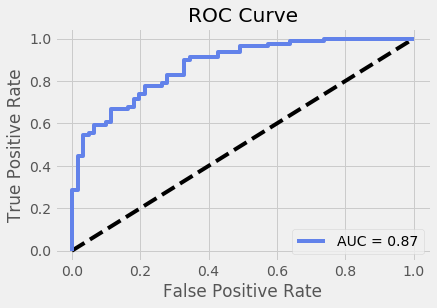

In [139]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logit_cv.predict_proba(train)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(train_labels, y_pred_prob)

#compute area under the curve
auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label="AUC = %0.2f" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [140]:
# predict the results 
a = test[['rpi', 'pyth_wins', 'turn_diff', 'off_strat', 'opp_rpi', 'opp_pyth_wins', 'opp_turn_diff', 'opp_off_strat']]
new_preds=logit_cv.predict(a)
new_new_test = test
new_new_test['prediction'] = new_preds
new_new_test['winner'] = list(test_labels)
new_new_test['win_prob'] = logit_cv.predict_proba(a)[:,1]
#future_games[['home_team','away_team','winner','win_prob']]
new_new_test

/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/samuelburgess/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

,rpi,pyth_wins,turn_diff,off_strat,opp_rpi,opp_pyth_wins,opp_turn_diff,opp_off_strat,win_prob,pred_home_win,pred_home_win_75,home_win,prediction,winner
9,0.204386,0.000000,0.305556,0.137462,0.328440,0.518336,0.388889,0.371368,0.377262,0,0,0.0,0.0,0.0
197,0.286460,0.500003,0.805556,0.505981,0.786852,0.719521,0.472222,0.878844,0.228786,0,0,0.0,0.0,0.0
66,0.328440,0.518336,0.388889,0.371368,0.913552,1.000000,0.972222,0.479701,0.088384,0,0,0.0,0.0,0.0
191,1.000000,0.927544,0.861111,0.324187,0.388837,0.437173,0.027778,0.487381,0.971176,1,1,0.0,1.0,0.0
117,0.328440,0.518336,0.388889,0.371368,0.672542,0.661773,0.583333,0.477214,0.350295,0,0,0.0,0.0,0.0
111,0.328440,0.518336,0.388889,0.371368,0.748632,0.928842,0.972222,0.398318,0.162281,0,0,1.0,0.0,1.0
15,0.948053,0.766340,0.333333,1.000000,0.353298,0.611574,0.611111,0.741931,0.823372,1,1,1.0,1.0,1.0
86,0.627611,0.542502,0.888889,0.420150,0.922348,0.862490,0.777778,0.366411,0.126335,0,0,0.0,0.0,0.0
75,0.772509,0.916472,0.833333,0.597355,0.576383,0.395707,0.722222,0.399547,0.798629,1,1,1.0,1.0,1.0
144,0.616477,0.783762,0.638889,0.472238,0.286460,0.500003,0.805556,0.505981,0.890291,1,1,1.0,1.0,1.0


In [141]:
print(accuracy_score(new_new_test['winner'], new_new_test['prediction']))

0.7464788732394366


In [142]:
len(new_new_test)

71

In [143]:
len(new_new_test[new_new_test.winner == 1])

45